# Data Preprocessing 

Based on findings from `01_explore_data.ipynb`, implementing comprehensive preprocessing pipeline.

## Preprocessing Steps

During one pass over the data, we will do the following preprocessing steps.
1. **Convert pseudo-RGB to grayscale** (automatic with cv2.IMREAD_GRAYSCALE)
2. **Resize to 224×224 pixels** (standardize for CNN input)
3. **Apply CLAHE** (enhance contrast + normalize quality variations)

Then, we can focus on some further cleanup after the initial preprocessing is complete.
4. **Remove duplicates** (if found during processing)
5. **Create train/val/test splits** (this is already done for us in the Kaggle dataset)
6. **Address class imbalance** (augmentation for no_tumor class)

**Note:** Outlier removal skipped - CLAHE normalizes quality variations.

## Convert pseudo-RGB to grayscale

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
import pandas as pd
import hashlib
from sklearn.model_selection import train_test_split
import json
from tqdm import tqdm  # For progress bars

In [2]:
# Preprocessing configuration
config = {
    'target_size': (224, 224),
    'apply_clahe': True,
    'clahe_clip_limit': 2.0,
    'clahe_tile_size': (8, 8),
    'random_seed': 42
}

# Paths
raw_dataset = Path("../data/brain_tumor_dataset")
processed_dataset = Path("../data/processed")

# Classes
classes = ['glioma_tumor', 'meningioma_tumor', 'pituitary_tumor', 'no_tumor']

print("Configuration:")
for key, value in config.items():
    print(f"  {key}: {value}")

Configuration:
  target_size: (224, 224)
  apply_clahe: True
  clahe_clip_limit: 2.0
  clahe_tile_size: (8, 8)
  random_seed: 42


In [3]:
image_hashes = {}

In [7]:
def preprocess_image(img_path, target_size=(224,224), equalization=True):
    """
    Apply all preprocessing steps to a single image.
    
    Args:
        img_path: Path to input image
        target_size: Target image size (height, width)
        hist_normalization: Whether to apply histogram equalization
        
    Returns:
        Preprocessed grayscale image (numpy array)
    """

    # read image as grayscale
    img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)

    if img is None:
            raise ValueError(f"Failed to read image: {img_path}")
    
    # resize so all images are the same size
    img = cv2.resize(img, target_size, interpolation=cv2.INTER_CUBIC)

    # apply clahe equalization
    if equalization:
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        img = clahe.apply(img)

    # compute image hash for duplicate detection
    img_hash = cv2.img_hash.pHash(img).tobytes()
    return img, img_hash

    

In [8]:
def preprocess_and_save_dataset(raw_dir, target_dir, config):
    """
    Process entire raw dataset and save to new folder
    
    Args:
        raw_dir: Path to raw dataset
        target_dir: Path to save preprocessed dataset
        config: Dictionary with preprocessing parameters

    Returns:
        Dictionary with processing statistics
    """

    raw_path = Path(raw_dir)
    target_path = Path(target_dir)

    if not target_path.exists():
        os.makedirs(target_path)
    
    # total images counts all images processed
    # class_counts is a dictionary that holds image counts per class
    stats = {'total_images': 0, 'class_counts': {}}

    splits = ['Training','Testing']    

    for split in splits:
        print(f"Processing {split} set...")
        
        for cls in classes:
            class_path_raw = raw_path / split / cls
            class_path_target = target_path / split / cls

            # iterate through each class folder
            for filename in os.listdir(class_path_raw):
                img_path = class_path_raw / filename

                # preprocess image
                img, img_hash = preprocess_image(img_path,
                                    target_size=config['target_size'],
                                    equalization=config['apply_clahe']
                )

                # save to target folder
                if not class_path_target.exists():
                    os.makedirs(class_path_target)
                target_img_path = class_path_target / filename
                cv2.imwrite(str(target_img_path), img)
                stats['total_images'] += 1
                if cls not in stats['class_counts']:
                    stats['class_counts'][cls] = 0
                stats['class_counts'][cls] += 1

                # store image hash
                image_hashes[img_path] = img_hash

In [9]:
preprocess_and_save_dataset(raw_dataset, processed_dataset, config)

Processing Training set...
Processing Testing set...


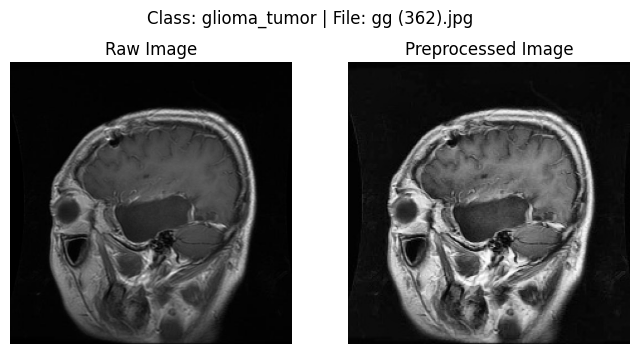

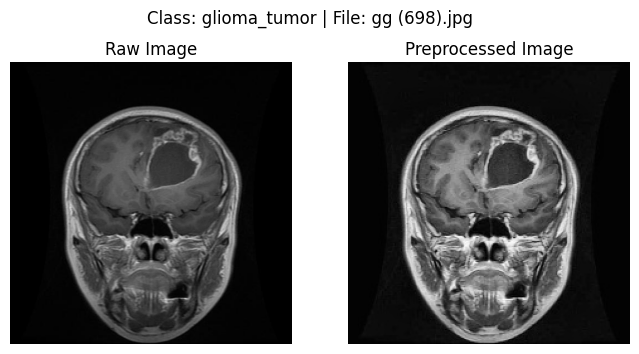

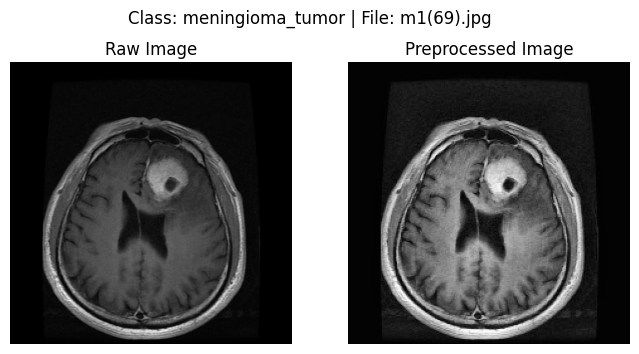

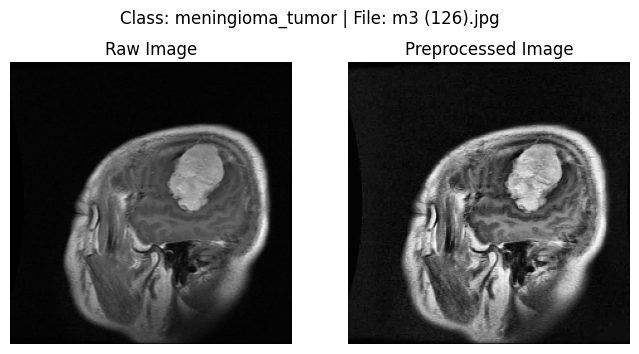

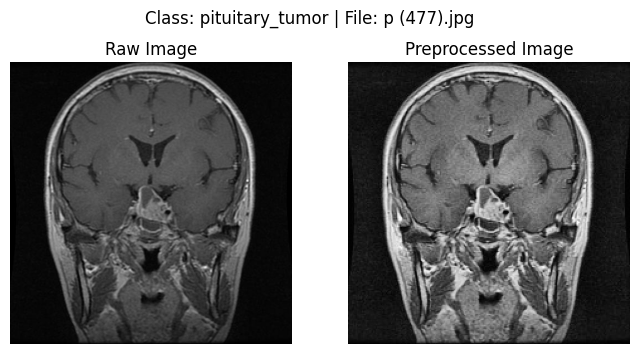

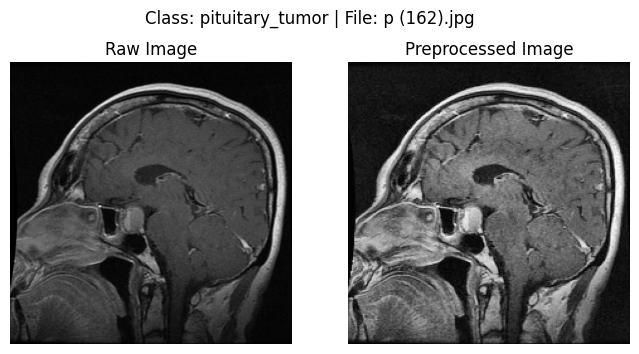

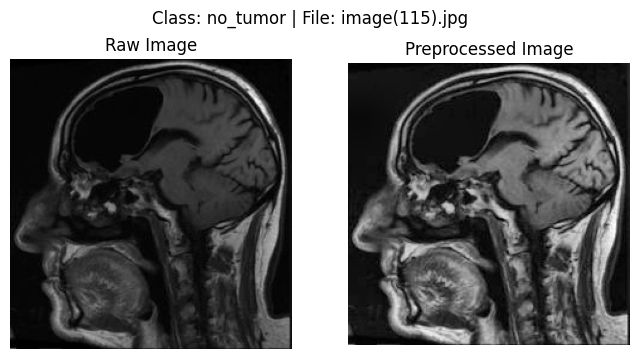

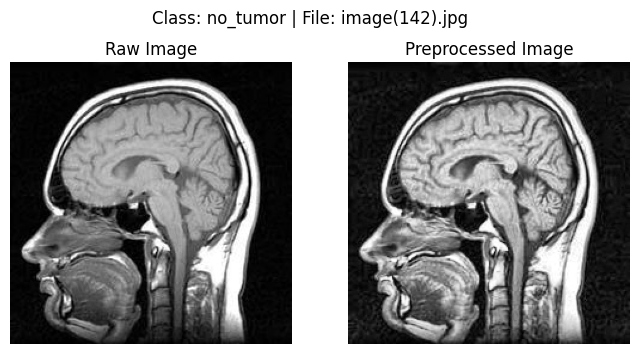

In [10]:
# show a few examples of preprocessed images before & after
def display_preprocessed_examples(raw_dir, processed_dir, classes, num_examples=3):
    raw_path = Path(raw_dir)
    processed_path = Path(processed_dir)

    for cls in classes:
        class_path_raw = raw_path / 'Training' / cls
        class_path_processed = processed_path / 'Training' / cls

        example_files = os.listdir(class_path_raw)[:num_examples]

        for filename in example_files:
            raw_img_path = class_path_raw / filename
            processed_img_path = class_path_processed / filename

            raw_img = cv2.imread(str(raw_img_path), cv2.IMREAD_GRAYSCALE)
            processed_img = cv2.imread(str(processed_img_path), cv2.IMREAD_GRAYSCALE)

            plt.figure(figsize=(8,4))
            plt.suptitle(f"Class: {cls} | File: {filename}")

            plt.subplot(1,2,1)
            plt.title("Raw Image")
            plt.imshow(raw_img, cmap='gray')
            plt.axis('off')

            plt.subplot(1,2,2)
            plt.title("Preprocessed Image")
            plt.imshow(processed_img, cmap='gray')
            plt.axis('off')

            plt.show()

display_preprocessed_examples(raw_dataset, processed_dataset, classes, num_examples=2)

## Duplicate Identification & Removal

https://psachin.gitlab.io/opencv_dup_images.html

In [ ]:
def find_duplicates(data_dir):
    """
    Find duplicate images in the dataset using hashing.
    Args:
        data_dir: Path to dataset directory

    Returns:
        List of duplicate file paths
    """



    # 

In [ ]:
def remove_duplicates():
    """
    """

In [ ]:
def visualize_preprocessing_effects():
    """
    """